In [3]:
import numpy as np
import matplotlib.pyplot as plt

# initialize n, T, initial state vector, tansition matrix and emission matrix
n=27
T = 430000
pi = []
a = []
b = []
obs = []

In [4]:
# Fill initial state vector
with open('initialStateDistribution.txt', 'r') as f:
    lines = f.readlines()
    for line in lines:
        pi.append(float(line.replace('\n','')))
        
pi = np.array(pi)
        
# Fill transition matrix
with open('transitionMatrix.txt', 'r') as f:
    lines = f.readlines()
    for line in lines:
        a.append([float(num) for num in line.replace('\n','').split(' ')])
        
a = np.array(a)
        
# Fill emission matrix
with open('emissionMatrix.txt', 'r') as f:
    lines = f.readlines()
    for line in lines:
        b.append([float(num) for num in line.replace('\n','').split('\t')])
        
b = np.array(b)
        
# Fill observations
with open('observations.txt', 'r') as f:
    lines = f.readlines()
    for line in lines:
        obs = [int(num) for num in line.replace('\n','').split(' ')]
        
obs = np.array(obs)

In [5]:
# Compute matrix L
L = np.zeros((n,T))

# Fill first column
for i in range(0,n):
    L[i,0] = np.log(pi[i]) + np.log(b[i,obs[0]])
    
# Fill other columns using previous columns (Viterbi)
for t in range(1,T):
    for j in range(0,n):
        L[j,t] = np.max(L[:,t-1]+np.log(a[:,j])) + np.log(b[j,obs[t]])
        
# Keep track of most likely states (back-tracking)
state = np.zeros(T).astype(int)
state[-1] = np.argmax(L[:,-1])

for t in range(T-2, -1, -1):
    state[t] = np.argmax(L[:,t] + np.log(a[:,state[t+1]]))

# Helper function to get letters from values of hidden states
def GetAlphabet(num):
    if(num>=0 and num<=25):
        return chr(97+num)
    elif(num==26):
        return ' '
    else:
        return ''

# Get the result string from states
result = "".join([GetAlphabet(state[t]) for t in range(0,T)])

# Get the output message by ignore repeated characters in result string
message = ""
for ch in result:
    if(message == "" or ch!=message[-1]):
        message += ch
        
print(message)

a house divided against itself canot stand


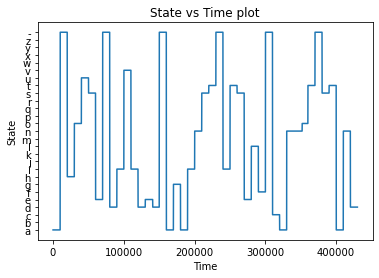

In [6]:
# Plot of the most likely sequence of hidden states versus time
x = [i for i in range(len(state))]
y = [state[i] for i in range(len(state))]

alphabets = list(map(chr, range(97, 123)))
alphabets.append('-')

plt.plot(x,y)
plt.xlabel("Time")
plt.ylabel("State")
plt.title("State vs Time plot")
plt.yticks(np.arange(27),alphabets)
plt.savefig('StatevsTimePlot.png')
plt.show()
plt.close()